# Clase Tabu search solver:

"Initial: Solution(sol=['D', 'A', 'C', 'B', 'G', 'E', 'F', 'H'], obj=310)"
iteration #0
Current: Solution(sol=['D', 'A', 'C', 'G', 'B', 'E', 'F', 'H'], obj=262)
iteration #1
Current: Solution(sol=['D', 'A', 'C', 'G', 'E', 'B', 'F', 'H'], obj=266)
iteration #2
Current: Solution(sol=['D', 'B', 'C', 'G', 'E', 'A', 'F', 'H'], obj=246)
iteration #3
Current: Solution(sol=['C', 'B', 'D', 'G', 'E', 'A', 'F', 'H'], obj=234)
iteration #4
Current: Solution(sol=['C', 'B', 'D', 'G', 'A', 'E', 'F', 'H'], obj=226)
iteration #5
Current: Solution(sol=['C', 'B', 'D', 'H', 'A', 'E', 'F', 'G'], obj=228)
iteration #6
Current: Solution(sol=['C', 'H', 'D', 'B', 'A', 'E', 'F', 'G'], obj=226)
iteration #7
Current: Solution(sol=['C', 'D', 'H', 'B', 'A', 'E', 'F', 'G'], obj=214)
iteration #8
Current: Solution(sol=['C', 'D', 'H', 'E', 'A', 'B', 'F', 'G'], obj=222)
iteration #9
Current: Solution(sol=['H', 'D', 'C', 'E', 'A', 'B', 'F', 'G'], obj=226)
iteration #10
Current: Solution(sol=['H', 'C', 'D', 'E', 'A', 'B'

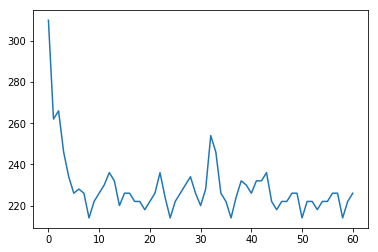

In [138]:
from collections import namedtuple
from itertools import combinations
from matplotlib import pyplot as plt
from pprint import pprint
import numpy as np
import pandas as pd

Solution = namedtuple('Solution', 'sol obj')

dis_df = pd.DataFrame([
    [0,1,2,3,1,2,3,4],
    [1,0,1,2,2,1,2,3],
    [2,1,0,1,3,2,1,2],
    [3,2,1,0,4,3,2,1],
    [1,2,3,4,0,1,2,3],
    [2,1,2,3,1,0,1,2],
    [3,2,1,2,2,1,0,1],
    [4,3,2,1,3,2,1,0]],
    columns=['A','B','C','D','E','F','G','H'],
    index=['A','B','C','D','E','F','G','H'],
)
flow_df = pd.DataFrame([
    [0,5,2,4,1,0,0,6],
    [5,0,3,0,2,2,2,0],
    [2,3,0,0,0,0,0,5],
    [4,0,0,0,5,2,2,10],
    [1,2,0,5,0,10,0,0],
    [0,2,0,2,10,0,5,1],
    [0,2,0,2,0,5,0,10],
    [6,0,5,10,0,1,10,0]],
    columns=['A','B','C','D','E','F','G','H'],
    index=['A','B','C','D','E','F','G','H'],
)

def move(sol, i, j):
    # cambia valores
    next_sol = list(sol)
    next_sol[i], next_sol[j] = next_sol[j], next_sol[i]
    return next_sol

def calc_obj_fun(sol, dis_df=dis_df, flow_df=flow_df):
    new_dis_df = dis_df.reindex(columns=sol, index=sol)
    new_dis_arr = np.array(new_dis_df)
    obj_fun_df = pd.DataFrame(new_dis_arr*flow_df)
    obj_fun_arr = np.array(obj_fun_df)
    return sum(sum(obj_fun_arr))

def get_neighborhood(sol):
    indexes = list(range(len(sol)))
    switches = combinations(indexes, 2)
    return [move(sol, *s) for s in switches]

runs = 60
tabu_len = 10
tabu_list = []
x0 = ['D','A','C','B','G','E','F','H']
obj = calc_obj_fun(x0)
initial = Solution(x0, obj)
best = initial
pprint(f'Initial: {initial}')
current_sol = initial
current_obj = []
current_obj.append(current_sol.obj)
# algoritmo
for i in range(runs):
    print(f'iteration #{i}')
    # obtiene vecindario
    neighborhood = get_neighborhood(current_sol.sol)
    neighbors = [Solution(n, calc_obj_fun(n)) for n in neighborhood]
    # print('Vecindario')
    # pprint(neighbors)
    # ordena vecindario
    neighbors.sort(key=lambda solution: solution.obj)
    # print('Vecindario ordenado')
    # pprint(neighbors)
    # Inserta mejor solucion en lista Tabu
    while len(tabu_list) >= tabu_len:
        tabu_list.pop() # drops last element from taboo
    tabu_index = 0
    current_sol = neighbors[tabu_index]
    while current_sol in tabu_list:
        tabu_index+=1
        current_sol = neighbors[tabu_index]
    tabu_list.insert(0, current_sol)
    # keep track of best solution so far
    best = best if best.obj < current_sol.obj else current_sol
    current_obj.append(current_sol.obj)
    print(f'Current: {current_sol}')
    # Get out of local minimum each 10 iterations
    if i % 10 == 0:
        indexes = list(range(len(current_sol.sol)))
        swaps = sorted(rnd.sample(indexes, 3))
        # double swap to get out of neighborhood
        sol = current_sol.sol
        sol = move(sol, swaps[0], swaps[1])
        sol = move(sol, swaps[0], swaps[2])
        obj = calc_obj_fun(sol)
        current_sol = Solution(sol, obj)
    # change length of taboo list every 5 iterations
    if i % 5 == 0:
        tabu_len = rnd.randint(5, 20)
# fin de algoritmo, imprime resultado final:
print()
print()
print('DYNAMIC TABU LIST')
print()
print(f'Initial: {initial}')
print(f'Final: {best}')
plt.plot(current_obj)

In [82]:
indexes = list(range(len(a)))
switches = list(combinations(indexes, 2))
neighbors = [move(a, *s) for s in switches]
objectives = [calc_obj_fun(sol) for sol in neighbors]
print(indexes)
pprint(list(zip(switches, objectives, neighbors)))

[0, 1, 2, 3, 4, 5, 6, 7]
[((0, 1), 260, ['B', 'A', 'C', 'D', 'E', 'F', 'G', 'H']),
 ((0, 2), 256, ['C', 'B', 'A', 'D', 'E', 'F', 'G', 'H']),
 ((0, 3), 278, ['D', 'B', 'C', 'A', 'E', 'F', 'G', 'H']),
 ((0, 4), 288, ['E', 'B', 'C', 'D', 'A', 'F', 'G', 'H']),
 ((0, 5), 272, ['F', 'B', 'C', 'D', 'E', 'A', 'G', 'H']),
 ((0, 6), 306, ['G', 'B', 'C', 'D', 'E', 'F', 'A', 'H']),
 ((0, 7), 360, ['H', 'B', 'C', 'D', 'E', 'F', 'G', 'A']),
 ((1, 2), 292, ['A', 'C', 'B', 'D', 'E', 'F', 'G', 'H']),
 ((1, 3), 304, ['A', 'D', 'C', 'B', 'E', 'F', 'G', 'H']),
 ((1, 4), 264, ['A', 'E', 'C', 'D', 'B', 'F', 'G', 'H']),
 ((1, 5), 308, ['A', 'F', 'C', 'D', 'E', 'B', 'G', 'H']),
 ((1, 6), 332, ['A', 'G', 'C', 'D', 'E', 'F', 'B', 'H']),
 ((1, 7), 304, ['A', 'H', 'C', 'D', 'E', 'F', 'G', 'B']),
 ((2, 3), 266, ['A', 'B', 'D', 'C', 'E', 'F', 'G', 'H']),
 ((2, 4), 272, ['A', 'B', 'E', 'D', 'C', 'F', 'G', 'H']),
 ((2, 5), 304, ['A', 'B', 'F', 'D', 'E', 'C', 'G', 'H']),
 ((2, 6), 294, ['A', 'B', 'G', 'D', 'E', 'F', '